# **A. Root finding for scalar nonlinear equations**

In [2]:
# import all the packages here
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Function that finds the fixed point of a certain function phi
#
# Possible usages:
# x, success, errEst, xHist = fpIterator(phi, x0, tol, maxit)
# x, success, errEst, xHist = fpIterator(phi, x0, tol)
# x, success, errEst, xHist = fpIterator(phi, x0)
# x, success, errEst, _ = fpIterator(phi, x0, tol, maxit)
# x, success, errEst, _ = fpIterator(phi, x0, tol)
# x, success, errEst, _ = fpIterator(phi, x0)
#
# INPUT:
# phi           iteration function (function handle)
# x0            initial guess for the root
# tol           desired tolerance to stop iterations
# maxit         maximum number of iterations
#
# OUTPUT:
# x             solution at the final iteration
# success       true means converged according to error estimator
# errEst        array with error estimate per iterations
# xHist         array with solutions per iterations

def fpIterator(phi, x0, tol=1e-8, maxit=20):

    # initialize your output variables here (x, errEst, xHist)

    # loop (at most maxit iterations) to find the root; possible strategies
    # 
    # inside the loop you will have to compute the new guess for the root and
    # check for convergence, i.e. check if the error at the current iteration 
    # reached the tolerance
    # if yes >>> break
    # if no >>> update the previous iteration x and iterate again

    # finally, update the success variable
    
    xHist = np.zeros(maxit+1) #it's faster to prepare the array and then just overwrite it
    xHist[0] = phi(x0)
    errEst = np.zeros(maxit+1)
    success = False 
    
    for i in range(1, maxit): 
        xHist[i] = phi(xHist[i-1])
        errEst[i-1] = abs(xHist[i] - xHist[i-1])
        if errEst[i-1] <= tol: 
            success= True #if we get a value within the bounds, success updates 
            break
    if np.count_nonzero(xHist) < len(xHist):
        xHist = xHist[:np.where(xHist == 0)[0][0]]
    
    if np.count_nonzero(errEst) < len(errEst):
        errEst = errEst[:np.where(errEst == 0)[0][0]]
    x= xHist[-1]
    
    return x, success, errEst, xHist 


In [4]:
a= np.array([0, 2, 0, 4, 5])
np.argwhere(a)

x0= np.arange(-2, 2, 0.25)

phi = lambda x: -1 / (x**2 - 2)

fpIterator(phi, 2)

(0.6180339332287108,
 False,
 array([1.07142857e+00, 2.61324042e-02, 1.11110620e-02, 5.00623092e-03,
        2.31324717e-03, 1.08123885e-03, 5.08086368e-04, 2.39352838e-04,
        1.12888600e-04, 5.32723913e-05, 2.51459355e-05, 1.18709909e-05,
        5.60442977e-06, 2.64598775e-06, 1.24925145e-06, 5.89813295e-07,
        2.78471343e-07, 1.31476173e-07, 6.20745926e-08]),
 array([-0.5       ,  0.57142857,  0.59756098,  0.60867204,  0.61367827,
         0.61599152,  0.61707275,  0.61758084,  0.61782019,  0.61793308,
         0.61798635,  0.6180115 ,  0.61802337,  0.61802898,  0.61803162,
         0.61803287,  0.61803346,  0.61803374,  0.61803387,  0.61803393]))

## Discussion question A.1(a)


In [5]:
## Discussion question A.1(a)

# after defining phi, x0, tol and maxit as written in the pdf, you set up 
# your output as follows

#defining the initial functions 
x0= np.arange(-2, 2.25, 0.25)

phi = lambda x: -1 / (x**2 - 2)

#running iterator 
results = []

for i,x in enumerate(x0): 
    results.append(fpIterator(phi, x, 1e-6))
    
# printing resutls 
print('FP iteration results:\n')
print('----------------------------------------------------')


# you will then add a print line e.g.:
for i, val in enumerate(results):
    if val[1]: #success is the first element of the tuple returned by fpIterator 
        print('x0 = %4.2f converged to %4.6f in %d iterations.' % (x0[i], val[0], len(val[3])))
    else:
        print('x0 = %4.2f failed to converge. Iterations: %d' % (x0[i], len(val[3])))


FP iteration results:

----------------------------------------------------
x0 = -2.00 converged to 0.618033 in 17 iterations.
x0 = -1.75 failed to converge. Iterations: 20
x0 = -1.50 converged to 0.618033 in 19 iterations.
x0 = -1.25 converged to 0.618034 in 19 iterations.
x0 = -1.00 converged to 1.000000 in 2 iterations.
x0 = -0.75 converged to 0.618035 in 17 iterations.
x0 = -0.50 converged to 0.618033 in 16 iterations.
x0 = -0.25 converged to 0.618034 in 17 iterations.
x0 = 0.00 converged to 0.618033 in 17 iterations.
x0 = 0.25 converged to 0.618034 in 17 iterations.
x0 = 0.50 converged to 0.618033 in 16 iterations.
x0 = 0.75 converged to 0.618035 in 17 iterations.
x0 = 1.00 converged to 1.000000 in 2 iterations.
x0 = 1.25 converged to 0.618034 in 19 iterations.
x0 = 1.50 converged to 0.618033 in 19 iterations.
x0 = 1.75 failed to converge. Iterations: 20
x0 = 2.00 converged to 0.618033 in 17 iterations.


In [6]:
# Function that finds the solution of an equation or system of equations
# using the Newton method
#
# Possible usages:
# x, success, errEst, xHist = newton(phi, x0, tol, maxit)
# x, success, errEst, xHist = newton(phi, x0, tol)
# x, success, errEst, xHist = newton(phi, x0)
# x, success, errEst, _ = newton(phi, x0, tol, maxit)
# x, success, errEst, _ = newton(phi, x0, tol)
# x, success, errEst, _ = newton(phi, x0)
#
# INPUT:
# f             function handling (may be vector valued)
# df            derivative of f (or function returning Jacobian matrix)
# x0            initial guess
# tol           desired toleraance to stop iterations
# maxit         maximum number of iterations
#
# OUTPUT:
# x             solution at the final iteration
# success       true means converged according to error estimator
# errEst        array with error estimate per iterations
# xHist         array with solutions per iterations
#

def newton(f, df, x0, tol=1e-8, maxit=20):

    # implementation should be trivial using your fpIterator with a properly 
    # implemented function phi
    
    phi= lambda x: x - f(x)/df(x)

    return fpIterator(phi, x0, tol, maxit)

## Discussion question A.2

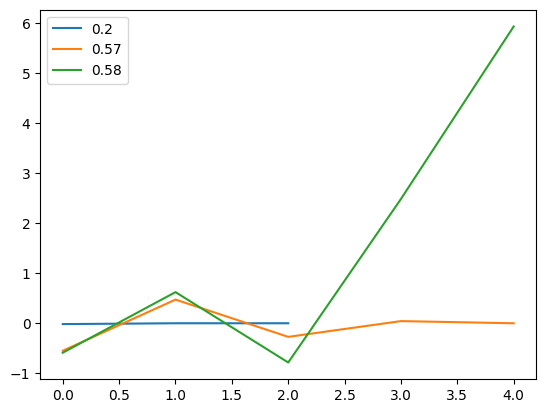

In [7]:
## Discussion question A.2

# set up inputs and initial guesses
# then for all the initial guesses you have to find the root using newton() and
# you have to plot xHist

# >>> consider cutting your xHist to improve plot readability 

x0 = [0.2, 0.57, 0.58]

f= lambda x: x / (1+x**2)

df= lambda x: (1-x**2) / (1+x**2)**2

k= [0, 1, 2, 3, 4, 5]

for i in x0:
    xk= newton(f, df, i, 1e-6)[3][:5]
    plt.plot(k[:len(xk)], xk, label= f'{i}')
    
plt.legend()
plt.show()

# **B. Root finding for systems of nonlinear equations**

## Discussion question B.1

In [8]:
# - set the correct inputs and find the root
# - compute the order
# - compute the factor
# - print out in a readable way, you can use the following code or something similar
f= lambda x: x*3 - 2*x + 1

df= lambda x: 3*x**2 -2 

er = newton(f, df, 1/4, 1e-12, maxit=20)[2]

p= np.log(er[-1]/er[-2])/np.log(er[-2]/er[-3])

ca= er[-1]/er[-2]**2

print('\n\nConvergence order results: \n')
print('    method            order                 factor')
print('----------------------------------------------------')
print(f'   Newton             {p}      {ca}')




Convergence order results: 

    method            order                 factor
----------------------------------------------------
   Newton             1.7203419699385794      74.77555768101278


## Discussion question B.2

In [27]:
## Discussion question B.2

# setup your matrix and vector defining the linear system
# then define F(x) and J(x)
# use newton to find the solution of the system 
# correctness of your implementation: which criteria do you need to check?

def fpIterator_vec(phi, x0, tol=1e-8, maxit=20):
    
    xHist = np.zeros(maxit+1, dtype=object) #it's faster to prepare the array and then just overwrite it
    #print(phi(x0))
    xHist[0] = phi(x0)
    errEst = np.zeros(maxit+1)
    success = False 
    
    for i in range(1, maxit): 
        xHist[i] = phi(xHist[i-1])
        errEst[i-1] = np.linalg.norm(xHist[i] - xHist[i-1])
        if errEst[i-1] <= tol: 
            success= True #if we get a value within the bounds, success updates 
            break 
            
    xHist = np.array([elem for elem in xHist if not (isinstance(elem, int) and elem == 0)])
    errEst = np.array([elem for elem in errEst if not (isinstance(elem, int) and elem == 0)])
    """        break
    if np.where(np.linalg.norm(xHist) == 0)[0][0] == 20:
        xHist = xHist[:np.where(np.linalg.norm(xHist) == 0)[0][0]]
    
    if np.where(np.linalg.norm(errEst) == 0)[0][0] == 20:
        errEst = errEst[:np.where(np.linalg.norm(errEst) == 0)[0][0]]
    x= xHist[-1]
    
    Fix this!!! 
    """
    x= xHist[-1]
    
    return x, success, errEst, xHist 

def newton_vec(f, jf, x0, tol=1e-8, maxit=20):
    
    """_summary_
    f is a vector function 
    jf is a jacobian of that function 
    Returns:
        _type_: _description_
    """

    # implementation should be trivial using your fpIterator with a properly 
    # implemented function phi
    
    phi= lambda x: x - np.matmul(np.linalg.inv(jf(x)),f(x))

    return fpIterator_vec(phi, x0, tol, maxit)

#definition of matrices 
A= np.array([[2, -1], [-1, 2]])
b= np.array([1, 0])

F= lambda x: np.array([2*x[0] - x[1], -x[0] + 2*x[1]]) - b
J= lambda x: A

sol= newton_vec(F, J, np.array([0,0]), 1e-6)
print(sol)


(array([0.66666667, 0.33333333]), True, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333]]))


For the method to be correct, J must be non-singular. 

In [28]:
## THIS FUNCTION IS GIVEN TO THE STUDENTS

# plotResidual_partB
#
# INPUT
# p         parameter which shifts the parabola

def plotResidual_partB(p):

    plt.figure(figsize=(18,10))

    nHat = np.array([0.5, 1])
    nHat = nHat/np.linalg.norm(nHat)
    tHat = np.array([nHat[1], -nHat[0]])
    xHat = np.array([[2],[1]])/np.sqrt(2)

    # For plotting the curves we parametrize them using angle (F1) and tangential co-ordinate (F2)
    par1 = lambda theta, p:  np.array([[2*np.cos(theta)], [np.sin(theta)]])
    par2 = lambda t, p: np.outer((tHat), t) + np.outer( (nHat), (np.matmul(nHat,xHat) + (p+0.5*np.power(t-np.matmul(tHat,xHat), 2)) ) )
    parametrizations = [par1, par2]

    paramRanges = [[0, 2*np.pi], [-1, 2.5]]
    paramStyles = ['r-','r--']

    N = 100
    xLim = [-5, 5]
    yLim = [-2.5, 3.5]

    # Plot contours of the error
    xVals = np.linspace(xLim[0], xLim[1], N)
    yVals = np.linspace(yLim[0], yLim[1], N)
    X, Y = np.array( np.meshgrid(xVals, yVals, indexing='xy') )

    s1 = lambda x,y: np.power( np.power(x/2, 2) + np.power(y, 2) - 1, 2)
    s2 = lambda x,y: np.power( nHat[0]*x + nHat[1]*y -np.matmul(nHat, xHat) - (p+0.5*np.power( (tHat[0]*x+tHat[1]*y-np.matmul(tHat, xHat)),2 )) ,2 )
    errFun = lambda x, y: np.sqrt(s1(x,y) + s2(x,y))
    Z = np.log10(errFun(X, Y))

    levels = np.arange(-2, 1, 0.25)
    plt.contourf( xVals, yVals, Z, levels )

    # Add parametrized curves
    i = 0
    for pdx in parametrizations:
        params = np.linspace(paramRanges[i][0], paramRanges[i][1], N)
        xyCoords = pdx(params, p)

        if i == 1:
            x = xyCoords[0, :]
            y = xyCoords[1, :]
        else:
            x = xyCoords[0, :][0]
            y = xyCoords[1, :][0]

        plt.plot(x, y, paramStyles[i])

        i += 1

    plt.colorbar()
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    plt.title('Colormap corresponds to $\log_{{10}}\sqrt{{F_1^2 + F_2^2}}$, where $p = %4.2f $' % p, fontsize=16)


<>:62: SyntaxWarning: invalid escape sequence '\l'
<>:62: SyntaxWarning: invalid escape sequence '\l'
/var/folders/28/8_cllykd4gg_kqtrdpl1th8w0000gn/T/ipykernel_21065/3943218284.py:62: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Colormap corresponds to $\log_{{10}}\sqrt{{F_1^2 + F_2^2}}$, where $p = %4.2f $' % p, fontsize=16)


EXPLORE THE CONVERGENCE OF THE METHOD

    p      x0      success   iter    order
---------------------------------------------------------


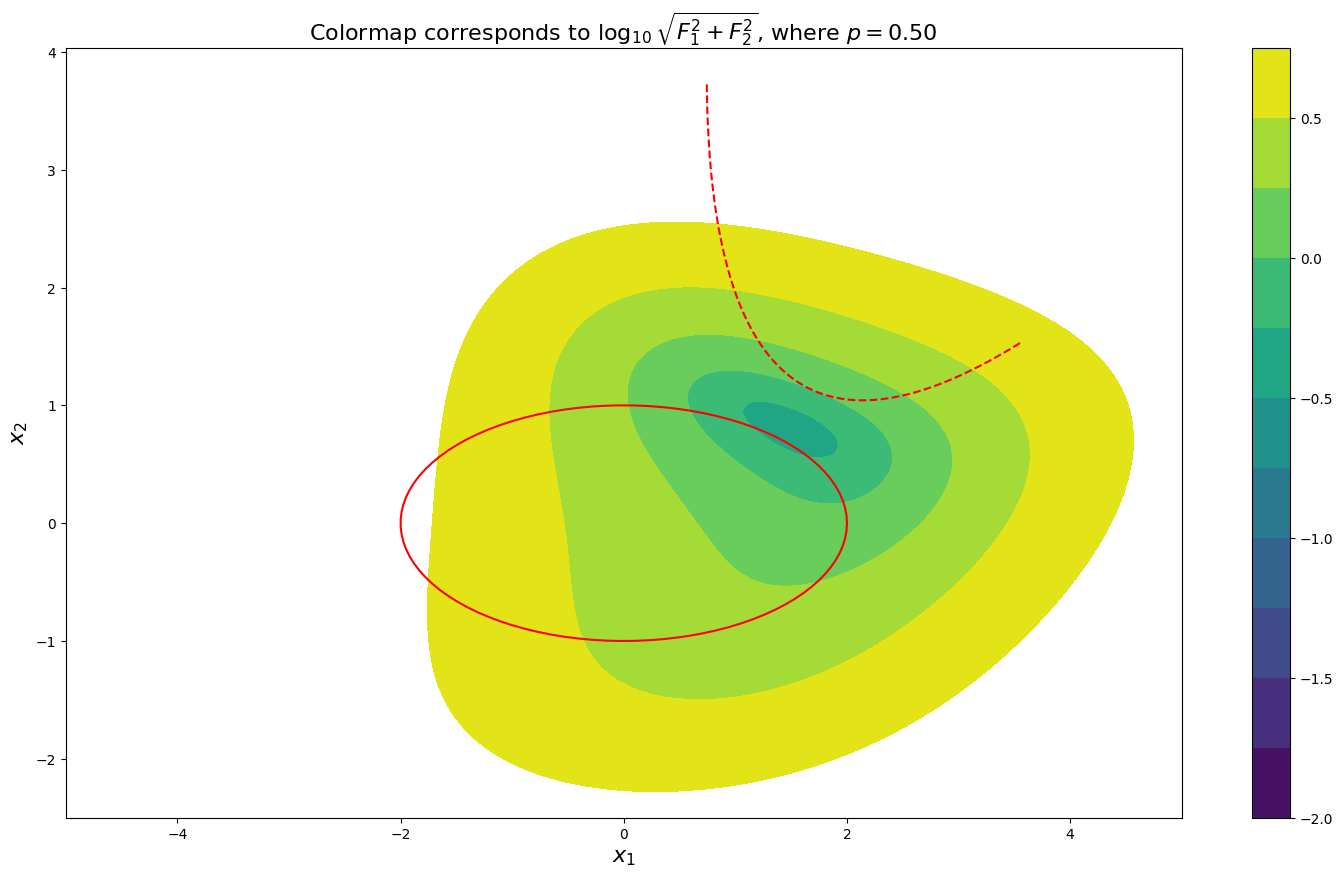

In [29]:
## Discussion question B.3

# set up the components of F as described in equation (7) and the
# jacobian components; you also need to define z, n and t

# set up the initial guesses as defined in the pdf


# print out the results as follows (or in a similar and readable way)
plotResidual_partB(0.5)
print('EXPLORE THE CONVERGENCE OF THE METHOD')
print('\n    p      x0      success   iter    order')
print('---------------------------------------------------------')

# for each value of p, you have to 
# - print out all the information that you set up before
# - use plotResidual_partB to plot the sequence {x^(k)}


# **C. Iterative solution to system of linear equations**

In [12]:
# INPUT
# A                   NxN matrix
# b                   Nx1 right-hand side
# x0                  initial guess
# static_richardson   boolean, True for static, False for dynamic
# tol                 (optional) desired tolerance
# maxIt               (optional) maximum number of iterations
# alpha0              (optional) static parameter
#
# OUTPUT
# x             approximate solution (last computed)
# success       true means converged according to error estimator
# errEst        error estimate per iteration = norm(x(k+1)-x(k))
# xHist         array with intermediate solutions

def richardson(A, b, x0, static_richardson, tol=1e-6, maxit=20, alpha0=10.):
    #
    # we want to solve Ax = b
    # the method can be written as a fixed point iteration:
    #       x_{k+1} = G(x_{k})
    # where
    #       G(x_{k}) = x_{k} - alpha_{k} * r_{k} =
    #                = x_{k} - alpha_{k} * (b - A*x_{k})
    #

    # you can use an if statement to generate static and dynamic inside the 
    # function and add inputs before the optional ones if you need 
    # something else

    return x, success, errEst, xHist


In [13]:
## Discussion question C.1

# set up the inputs of richardson() and consider creating a loop to vary alpha 
# and saving the number of iterations (it should help to minimize errors)


In [14]:
## Discussion question C.2 (a)-(b)

# set up the inputs for richardson() and x_star
# set up the optimal value of alpha 

# find the root in both static and dynamic cases and plot the error estimates
# and the true errors


In [15]:
## Discussion question C.2 (c)-(d)

# repeat the previous exercise modifying the system of equations
